## Exercises: Data Visualizations in Python

We will be using [this dataset](https://www.kaggle.com/datasets/arnavvvvv/spotify-music/data) from Kaggle on Top Spotify Songs. No need to dowload it, it is already in the `exercises` directory.

### Setting Up Your Data

Before you dive into data visualizations, you need to set up your dataframe and make sure that it is cleaned and ready to go.

In [33]:
# import all libraries and modules needed
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv("./Popular_Spotify_Songs.csv", encoding='latin-1')

df.head()

data_2023 = df.loc[df['released_year'] == 2023]
    



In [2]:
# import and clean data
df = df.dropna()
print(df.to_string())
df.info
df['streams'] = df['streams'].drop([8,574])
df['streams'] = df['streams'].astype(float)

                                                                                                                      track_name                                                                                                               artist(s)_name  artist_count  released_year  released_month  released_day  in_spotify_playlists  in_spotify_charts                                                                                                 streams  in_apple_playlists  in_apple_charts in_deezer_playlists  in_deezer_charts in_shazam_charts  bpm key   mode  danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%
0                                                                                            Seven (feat. Latto) (Explicit Ver.)                                                                                                             Latto, Jung Kook             2           2023               7            14                   553

### Creating Visualizations

Now that the data is ready, you can use the dataset to create a number of different visualizations. You do not need to make the visualizations perfect; this is just for practice.

#### Line Chart

<Axes: xlabel='released_month'>

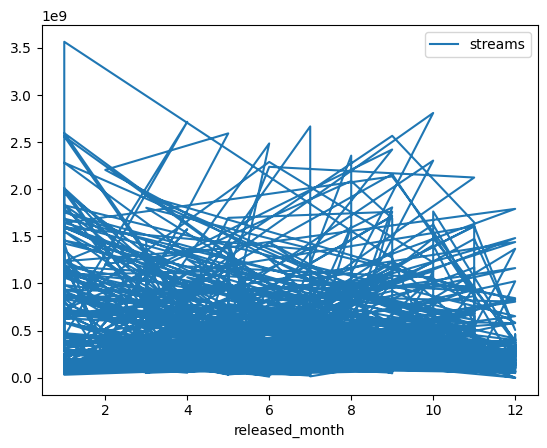

In [54]:
# Single line chart

df.plot(x = 'released_month', y = 'streams')

<Axes: xlabel='released_month'>

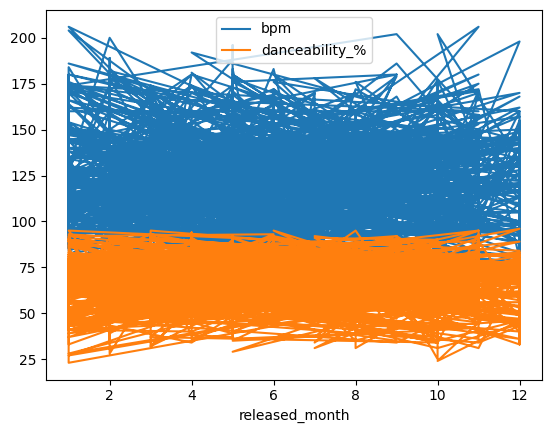

In [20]:
# Multiple Line chart 
df.plot(x = 'released_month', y = ['bpm', 'danceability_%'])

#### Bar Chart

(array([0.0e+00, 5.0e+08, 1.0e+09, 1.5e+09, 2.0e+09, 2.5e+09, 3.0e+09,
        3.5e+09, 4.0e+09]),
 [Text(0, 0.0, '0.0'),
  Text(0, 500000000.0, '0.5'),
  Text(0, 1000000000.0, '1.0'),
  Text(0, 1500000000.0, '1.5'),
  Text(0, 2000000000.0, '2.0'),
  Text(0, 2500000000.0, '2.5'),
  Text(0, 3000000000.0, '3.0'),
  Text(0, 3500000000.0, '3.5'),
  Text(0, 4000000000.0, '4.0')])

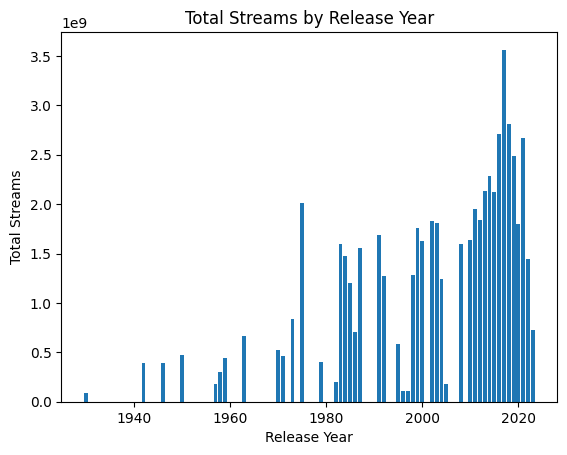

In [52]:
# Vertical bar chart

x = df['released_year']
y = df['streams']
plt.bar(x,y)
plt.title('Total Streams by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Total Streams')
plt.xticks()
plt.yticks()


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14')])

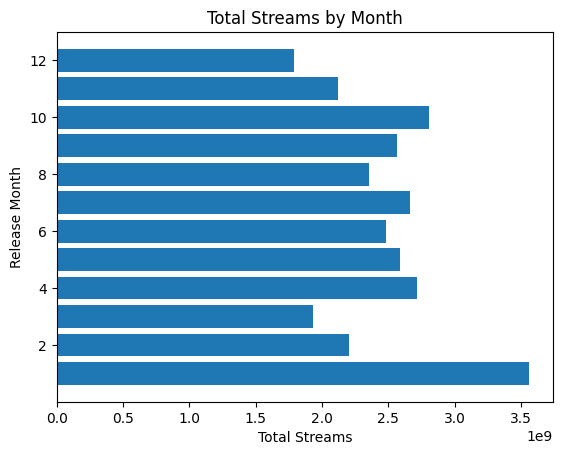

In [16]:
# Horizontal bar chart
x = df['released_month']
y = df['streams']
plt.barh(x,y)
plt.title('Total Streams by Month')
plt.ylabel('Release Month')
plt.xlabel('Total Streams')


In [8]:
# Grouped bar chart
x = df['artist(s)_name'].head(5)
y = df[['acousticness_%', 'danceability_%']]
df.plot(x, y,
        kind='bar', 
        stacked=False, 
        title='Acousticness and Danceability by Artist Name')
plt.ylabel('Streams')
plt.title('Streams by Artist Name')
plt.legend(loc='upper left', ncols=5)

plt.show()

KeyError: ('acousticness_%', 'danceability_%')

#### Scatter Plot

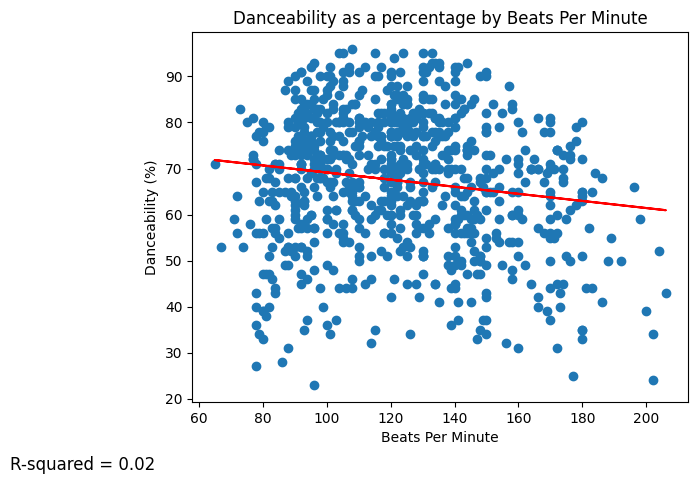

In [31]:
# scatter plot
from sklearn.linear_model import LinearRegression
import numpy as np
x = df['bpm']
y = df['danceability_%']

model = LinearRegression().fit(x.values.reshape(-1, 1), y)
r2 = model.score(x.values.reshape(-1, 1), y)

#from sklearn.metrics import r2_score
#r2 = r2_score(x, y)
#plt.annotate("r-squared = {:.3f}".format(r2_score(x, y)), (0, 1))

plt.scatter(x,y)
plt.xlabel('Beats Per Minute')
plt.ylabel('Danceability (%)')
plt.title('Danceability as a percentage by Beats Per Minute')
plt.plot(x, model.predict(x.values.reshape(-1, 1)), color='red')
plt.text(1, 4.5, f'R-squared = {r2:.2f}', fontsize=12)


plt.show()
# near-zero r^2 value indicates no significant correlation

#### Histogram

Text(0.5, 1.0, 'Frequency of BPM in songs from 2023')

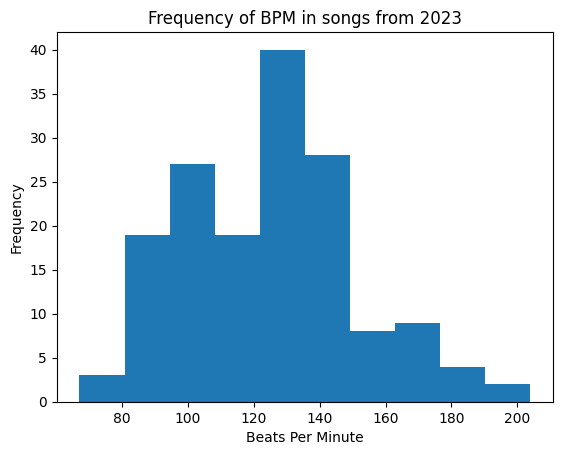

In [51]:
# histogram
data_2023 = data_2023.dropna()
x = data_2023['bpm']
plt.hist(x)
plt.ylabel('Frequency')
plt.xlabel('Beats Per Minute')
plt.title('Frequency of BPM in songs from 2023')

#### Pie Chart

([<matplotlib.patches.Wedge at 0x1c85d64be30>,
 [Text(1.0995914250255099, 0.029978292319081796, ''),
  Text(1.0969357626713767, 0.08204835508750433, ''),
  Text(1.0925901921285834, 0.12746243393417941, ''),
  Text(1.0859529839898248, 0.17523160834619883, ''),
  Text(1.0774913996414714, 0.22138718052015377, ''),
  Text(1.0673848360861435, 0.2658751806644555, ''),
  Text(1.0550742765345622, 0.31115634493783084, ''),
  Text(1.041264701110057, 0.3546375927932394, ''),
  Text(1.027536800532583, 0.3926424882144866, ''),
  Text(1.0119118579767201, 0.43131704312037383, ''),
  Text(0.9925957998496224, 0.47408182639802654, ''),
  Text(0.9739083809818924, 0.5113731176481898, ''),
  Text(0.9505572434659307, 0.5535710676096173, ''),
  Text(0.9189835411030582, 0.6045405289818739, ''),
  Text(0.8877683653896338, 0.6495131479911841, ''),
  Text(0.8584448902109856, 0.687802566490304, ''),
  Text(0.8283295670213814, 0.7237887318811831, ''),
  Text(0.7967068642051964, 0.758457759224812, ''),
  Text(0.764

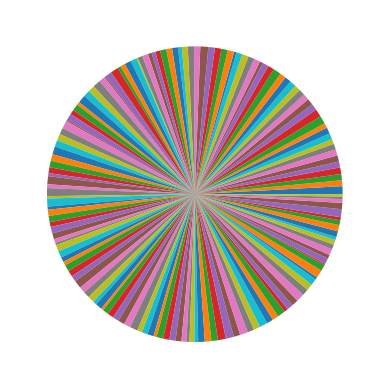

In [48]:
# pie chart
#data_2023['rm'] = data_2023.groupby(['released_month'])['released_month'].transform('count')

#data_2023['sum of released month'] = data_2023['released_month'].agg('sum')
#plt.pie(data_2023['rm'], labels = data_2023['released_month'])

data_2023['key_frequency'] = data_2023.groupby(['key'])['key'].transform('count')
plt.pie(data_2023['key_frequency'])